In [1]:
#needed after restructuring of directory
import os
os.chdir('/Users/alexchandler/UFC_Prediction_2022')
os.getcwd()

'/Users/alexchandler/UFC_Prediction_2022'

In [2]:
#this is all copied from https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

from torchvision.utils import save_image
import torch
import torchvision

from os.path import exists

import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cnn = models.vgg19(pretrained=True).features.to(device).eval()

style 0


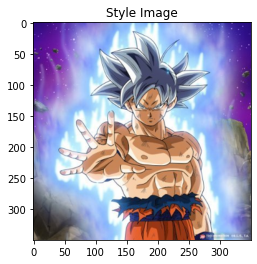

style 1


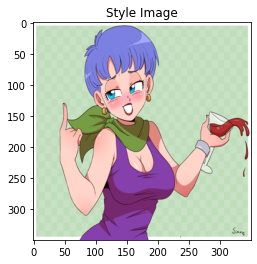

style 2


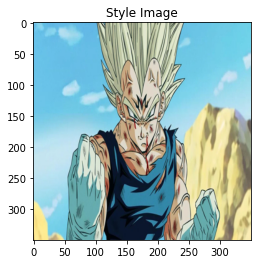

style 3


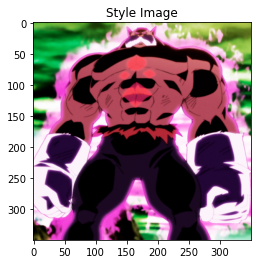

style 4


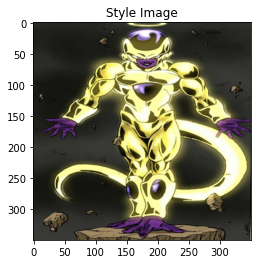

style 5


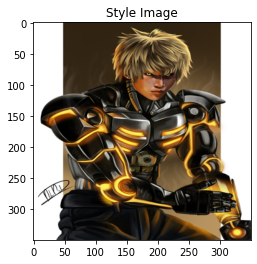

style 6


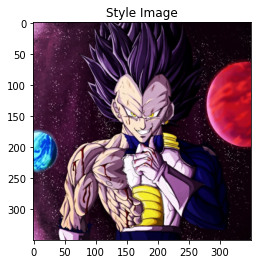

style 7


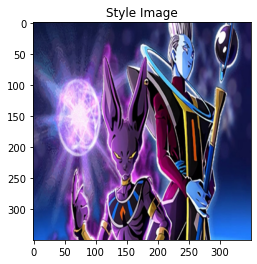

style 8


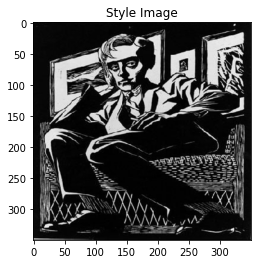

style 9


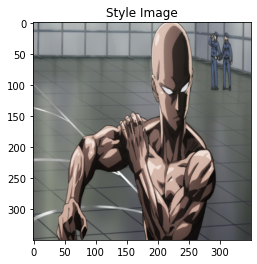

style 10


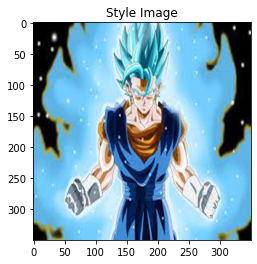

style 11


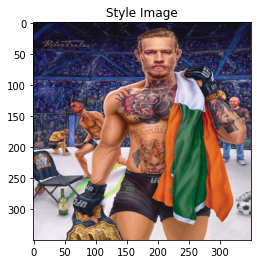

style 12


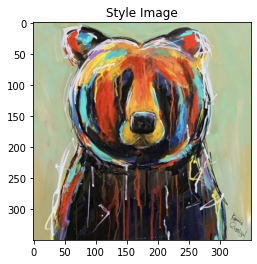

style 13


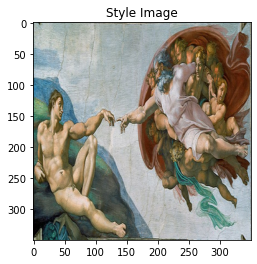

In [3]:
default_im_size = 350

# desired size of the output image
imsize = 512 if torch.cuda.is_available() else default_im_size  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor

def image_loader(image):
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

styleimage0=Image.open("src/content/images/escher1.jpeg") 
styleimage1=Image.open("src/content/images/onepunch.jpg")
styleimage2=Image.open("src/content/images/pixelart.jpeg")
styleimage3=Image.open("src/content/images/vegito.jpeg") 
styleimage4=Image.open("src/content/images/conorpainting.jpeg")  
styleimage5=Image.open("src/content/images/picasso.jpeg")  
styleimage6=Image.open("src/content/images/paintedoblivion.webp")
styleimage7=Image.open("src/content/images/starrynight.jpeg")
styleimage8=Image.open("src/content/images/bear.jpeg")
styleimage9=Image.open("src/content/images/god.jpeg")
styleimage10=Image.open("src/content/images/vangogh.jpeg")  

thresh={0:950,
       1: 250,
        2:1200,
        3: 800,
        4:250,
        5: 40,
        6: 60, 
        7: 100,
        8: 200,
        9: 150,
        10: 160,
       }


styleimage0=styleimage0.resize((default_im_size,default_im_size))
styleimage1=styleimage1.resize((default_im_size,default_im_size))
styleimage2=styleimage2.resize((default_im_size,default_im_size))
styleimage3=styleimage3.resize((default_im_size,default_im_size))
styleimage4=styleimage4.resize((default_im_size,default_im_size))
styleimage5=styleimage5.resize((default_im_size,default_im_size))
styleimage6=styleimage6.resize((default_im_size,default_im_size))
styleimage7=styleimage7.resize((default_im_size,default_im_size))
styleimage8=styleimage8.resize((default_im_size,default_im_size))
styleimage9=styleimage9.resize((default_im_size,default_im_size))
styleimage10=styleimage10.resize((default_im_size,default_im_size))



fighterimage=Image.open("src/content/images/2KhamzatChimaev.jpg")
fighterimage=fighterimage.resize((default_im_size,default_im_size))

style = [image_loader(styleimage0),image_loader(styleimage1),image_loader(styleimage2),
         image_loader(styleimage3), image_loader(styleimage4), image_loader(styleimage5), 
         image_loader(styleimage6), image_loader(styleimage7), image_loader(styleimage8),
        image_loader(styleimage9), image_loader(styleimage10)]

#defining an alternate line of styles
styleimage0alt=Image.open("src/content/images/uigoku.jpeg")  
styleimage1alt=Image.open("src/content/images/bulma.jpeg")
styleimage2alt=Image.open("src/content/images/vegeta.webp")
styleimage3alt=Image.open("src/content/images/top.webp")  
styleimage4alt=Image.open("src/content/images/frieza.jpeg")
styleimage5alt=Image.open("src/content/images/genos.jpeg")  
styleimage6alt=Image.open("src/content/images/uevegeta.webp")
styleimage7alt=Image.open("src/content/images/whis.jpg")

styleimage8alt=Image.open("src/content/images/escher1.jpeg") 
styleimage9alt=Image.open("src/content/images/onepunch.jpg")
styleimage10alt=Image.open("src/content/images/vegito.jpeg") 
styleimage11alt=Image.open("src/content/images/conorpainting.jpeg")  

styleimage12alt=Image.open("src/content/images/bear.jpeg")
styleimage13alt=Image.open("src/content/images/god.jpeg")

threshalt={0: 600,
           1: 500, #skip?
           2: 1250,
           3: 1250,
           4:500,
           5:600,
           6:400,
           7: 1250,
           8:950,
           9: 500,
            10: 800,
            11:300,
            12: 300,
            13: 250,
       }

styleimage0alt=styleimage0alt.resize((default_im_size,default_im_size))
styleimage1alt=styleimage1alt.resize((default_im_size,default_im_size))
styleimage2alt=styleimage2alt.resize((default_im_size,default_im_size))
styleimage3alt=styleimage3alt.resize((default_im_size,default_im_size))
styleimage4alt=styleimage4alt.resize((default_im_size,default_im_size))
styleimage5alt=styleimage5alt.resize((default_im_size,default_im_size))
styleimage6alt=styleimage6alt.resize((default_im_size,default_im_size))
styleimage7alt=styleimage7alt.resize((default_im_size,default_im_size))

styleimage8alt=styleimage8alt.resize((default_im_size,default_im_size))
styleimage9alt=styleimage9alt.resize((default_im_size,default_im_size))
styleimage10alt=styleimage10alt.resize((default_im_size,default_im_size))
styleimage11alt=styleimage11alt.resize((default_im_size,default_im_size))
styleimage12alt=styleimage12alt.resize((default_im_size,default_im_size))
styleimage13alt=styleimage13alt.resize((default_im_size,default_im_size))

stylealt = [image_loader(styleimage0alt),image_loader(styleimage1alt),image_loader(styleimage2alt),
           image_loader(styleimage3alt), 
         image_loader(styleimage4alt), 
           image_loader(styleimage5alt),image_loader(styleimage6alt),image_loader(styleimage7alt),
           image_loader(styleimage8alt),image_loader(styleimage9alt),
         image_loader(styleimage10alt), image_loader(styleimage11alt), 
          image_loader(styleimage12alt),
        image_loader(styleimage13alt)]

#loading a fighter image
fighterimage=Image.open("src/content/images/2KhamzatChimaev.jpg")
fighterimage=fighterimage.resize((default_im_size,default_im_size))

content_img = image_loader(fighterimage)
assert all(style[i].size() == content_img.size() for i in range(len(style))), \
    "we need to import style and content images of the same size"

unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated
    
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input
    
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input
    
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# create a module to normalize input image so we can easily put it in a
# nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize img
        return (img - self.mean) / self.std
    
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # normalization module
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # just in order to have an iterable access to or list of content/syle
    # losses
    content_losses = []
    style_losses = []

    # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ContentLoss
            # and StyleLoss we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

input_img = content_img.clone()
# if you want to use white noise instead uncomment the below line:
# input_img = torch.randn(content_img.data.size(), device=device)

def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.LBFGS([input_img])
    return optimizer

def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)
    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    input_img.requires_grad_(True)
    model.requires_grad_(False)
    optimizer = get_input_optimizer(input_img)
    run = [0]
    while run[0] <= num_steps:
        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)
            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            style_score *= style_weight
            content_score *= content_weight
            loss = style_score + content_score
            loss.backward()
            run[0] += 1
            if run[0] ==50:
                print('Style Loss : {:4f}'.format(style_score.item()))
            return style_score + content_score
        optimizer.step(closure)
    # a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)
    return input_img

alt=False

def run_style_transfer_adaptive(cnn, normalization_mean, normalization_std,
                       content_img, styleindex, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    style_img=style[styleindex]
    if alt==True:
        style_img=stylealt[styleindex]
    firstLoss={0:0}
    """Run the style transfer."""
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)
    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    input_img.requires_grad_(True)
    model.requires_grad_(False)
    optimizer = get_input_optimizer(input_img)
    run = [0]
    while run[0] <= num_steps and firstLoss[0]==0:
        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)
            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            style_score *= style_weight
            content_score *= content_weight
            loss = style_score + content_score
            loss.backward()
            run[0] += 1
            if run[0] % 50 == 0:
                if (style_score.item()>thresh[styleindex] and alt==False) or (style_score.item()>threshalt[styleindex] and alt==True):
                    firstLoss[0]=style_score.item()
            return style_score + content_score
        optimizer.step(closure)
    # a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)
    if firstLoss[0]==0:
        return input_img
    else:
        return 'empty'
    
#importing fighter names
ufcfighterscrap =pd.read_csv('src/content/data/processed/fighter_stats.csv',sep=',',low_memory=False)
names = list(ufcfighterscrap['name'])

def unstylized_images():
    #computes the number of remaining names
    i=0
    for name in names:
        for j in range(1,5):
            try:
                name = name.replace(" ","")
                fighterimage=Image.open("src/content/images2/"+str(j)+name+".jpg")
            except:
                i+=1
                pass
    print('there are '+str(i)+' images left to stylize. '+str(i//60)+' hours remaining...')

# this will stylize the list of names given (unless already stylized)
# or otherwise takes the list of names to be all unstylized names
alt=True
def stylize(listofnames=names):
    i=0
    for name in listofnames:
        i+=1
        for j in range(1,5):
            try:
                name = name.replace(" ","")
                fighterimage=Image.open("src/content/images2/"+str(j)+name+".jpg")
                #print("images2/"+str(j)+name+".jpg is already stylized")
            except:
                try:
                    name = name.replace(" ","")
                    fighterimage=Image.open("src/content/images/"+str(j)+name+".jpg")
                    fighterimage=fighterimage.resize((default_im_size,default_im_size))
                    content_img = image_loader(fighterimage)
                    styleindex=random.randint(1,len(stylealt))-1
                    output = 'empty'
                    k=0
                    while output =='empty':
                        if k>len(stylealt):
                            print(str(j)+' couldnt find a good style for '+str(j)+name)
                            break
                        k+=1
                        input_img = content_img.clone()
                        styleindex=(styleindex+1)%len(stylealt)
                        output = run_style_transfer_adaptive(cnn, cnn_normalization_mean, cnn_normalization_std,
                                           content_img, styleindex, input_img, num_steps=300,
                                           style_weight=1000000, content_weight=1)
                    img1 = output
                    save_image(img1, "src/content/images2/"+str(j)+name+".jpg")
                    print(str(i)+' saving: '+"src/content/images2/"+str(j)+name+".jpg"+' in style '+str(styleindex))
                except:
                    print('something is going wrong with '+name)
                    pass
                pass
    
# add the original input image to the figure:
plt.figure()

for i in range(len(stylealt)):
    print('style '+str(i))
    imshow(stylealt[i], title='Style Image')

#importing functions
#needed after restructuring of directory
os.chdir('/Users/alexchandler/UFC_Prediction_2022/src')
from fight_stat_helpers import *
os.chdir('/Users/alexchandler/UFC_Prediction_2022')



In [4]:
#indicates how many pictures are left unstylized and the time remaining
unstylized_images()

there are 3943 images left to stylize. 65 hours remaining...


In [ ]:
#stylizes all unstylized pictures one at a time (will take a long time to run)
#note: the initial list of "something is going wrong..." is due to these being fighters who recently debuted
#meaning we need to write a function in the image scrape notebook to update the image scrape for these fighters
stylize()

something is going wrong with DanielSantos
something is going wrong with DanielSantos
something is going wrong with DanielSantos
something is going wrong with DanielSantos
something is going wrong with MikeMalott
something is going wrong with MikeMalott
something is going wrong with MikeMalott
something is going wrong with MikeMalott
something is going wrong with PieraRodriguez
something is going wrong with PieraRodriguez
something is going wrong with PieraRodriguez
something is going wrong with PieraRodriguez
something is going wrong with JoshFremd
something is going wrong with JoshFremd
something is going wrong with JoshFremd
something is going wrong with JoshFremd
something is going wrong with DenisTiuliulin
something is going wrong with DenisTiuliulin
something is going wrong with DenisTiuliulin
something is going wrong with DenisTiuliulin


/var/folders/zr/jttn57m976g1m1_y2p2t8zwm0000gn/T/ipykernel_48710/2701813690.py:192: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/var/folders/zr/jttn57m976g1m1_y2p2t8zwm0000gn/T/ipykernel_48710/2701813690.py:193: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


35 saving: src/content/images2/2BradyHiestand.jpg in style 4
405 saving: src/content/images2/3RaphaelAssuncao.jpg in style 5
557 saving: src/content/images2/4CoreyAnderson.jpg in style 8
588 saving: src/content/images2/2BevonLewis.jpg in style 7
something is going wrong with SergeyKhandozhko
687 saving: src/content/images2/1JoeLauzon.jpg in style 9
699 saving: src/content/images2/1MikeDavis.jpg in style 0
705 saving: src/content/images2/4DhiegoLima.jpg in style 2
713 saving: src/content/images2/2DaniloBelluardo.jpg in style 9
729 saving: src/content/images2/4ViniciusMoreira.jpg in style 9
730 saving: src/content/images2/1ClaudioPuelles.jpg in style 3
731 saving: src/content/images2/2MarcosMariano.jpg in style 5
731 saving: src/content/images2/3MarcosMariano.jpg in style 9
something is going wrong with ToddDuffee
735 saving: src/content/images2/4AntonioCarlosJunior.jpg in style 10
something is going wrong with MishaCirkunov
737 saving: src/content/images2/2ColeSmith.jpg in style 6
somet

In [ ]:
#computes all fighters above score within timeframe
score=5
timeframe=2 #years
favorites = []
for name in names:
    if fighter_score(name, "March 1, 2022",timeframe)>score:
        favorites.append(name)
len(favorites)

In [ ]:
stylize(favorites)

In [ ]:
#  list of missing or corrupted entries from images2
# [
#1MichaelChandler,
# 4BloodDiamond,
# 2JPBuys,
# 3JPBuys,
# 1WilliamKnight,
# 3WilliamKnight,
# 2BobbyGreen,
# 2DanielCormier,
# 1DanielCormier
# 4ChanSungJung
# 2AleksandarRakic
# 3JaredGooden
# 1VolkanOezdemir
# 3MikePerry
# 1KhamaWorthy
# 2PhilipeLins
# 4KayHansen
# 3JordanGriffin
# 3MarionReneau
# 3OskarPiechota
#]


In [ ]:
#to test the most recently added style image
def apply_style(image, styleindex):
    fighterimage=Image.open(image);fighterimage
    fighterimage=fighterimage.resize((default_im_size,default_im_size))
    content_img = image_loader(fighterimage)
    input_img = content_img.clone()
    if alt==True:
        output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                content_img, stylealt[styleindex], input_img)
    else:
        output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                content_img, style[styleindex], input_img)

    plt.figure()
    imshow(output, title='Output Image')

    # sphinx_gallery_thumbnail_number = 4
    plt.ioff()
    plt.show()

In [ ]:
imshow(stylealt[8])

In [ ]:
alt = True
apply_style("src/content/images/"+str(2)+'MichelPereira'+".jpg",8)

In [ ]:
#testing thresholds
alt=True
for j in range(len(stylealt)):
    for name in ['RoyceGracie','ColbyCovington','KhamzatChimaev','JustinGaethje','TomAspinall']:
        i=random.randint(1,4)
        print('style '+str(j))
        apply_style("src/content/images/"+str(i)+name+".jpg",j)

In [ ]:
#checking favorites pictures so we can throw away bad style transfers
for name in favorites:
    for j in range(1,5):
        try:
            name = name.replace(" ","")
            print(str(j)+name)
            fighterimage=Image.open("src/content/images2/"+str(j)+name+".jpg")
            content_img = image_loader(fighterimage)
            imshow(content_img)
        except:
            print(str(j)+name+' is not in images2')

In [ ]:
bad_images=['2FrankieEdgar','2AleksandarRakic','1CirylGane','2CirylGane','3CirylGane','1ColbyCovington','4ColbyCovington',
            '4GermainedeRandamie','2JoeSolecki','4JoeSolecki','1DouglasSilvadeAndrade','2RustamKhabilov','4NateDiaz',
            '2YairRodriguez','1TaiTuivasa','3TaiTuivasa','1JaredCannonier','4JaredCannonier','4KhabibNurmagomedov',
            '2IslamMakhachev','3IslamMakhachev','4ShamilAbdurakhimov','2LizCarmouche','3LizCarmouche','4LizCarmouche',
            '1LeonEdwards','2LeonEdwards','4LeonEdwards','1JuliannaPena','3JuliannaPena','3LukeRockhold',
            '1AndersonSilva','2AndersonSilva','3AndersonSilva','4AndersonSilva','2AlanJouban','2BrianOrtega',
            '4BrianOrtega','1SeanStrickland','4SeanStrickland','3LyotoMachida','2MichaelBisping','4MichaelBisping',
            '2GeorgesSt-Pierre','1DongHyunKim'
           ]


In [ ]:
#replacing bad images
new_images={}
for name in bad_images:
    for j in range(len(stylealt)):
        image = "src/content/images/"+name+".jpg"
        fighterimage=Image.open(image)
        fighterimage=fighterimage.resize((default_im_size,default_im_size))
        content_img = image_loader(fighterimage)
        input_img = content_img.clone()
        output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                    content_img, stylealt[j], input_img)
        new_images[name+str(j)]=output
        plt.figure()
        print(name+str(j))
        imshow(output)
        plt.ioff()
        plt.show()

In [ ]:
#to save
fixes=['1FrankieEdgar8']

In [ ]:
# for each name above, pick a style and save to disk with this
name='3MagomedAnkalaev4' #picture number and name
save_image(new_images[name], "src/content/images2/"+name[:len(name)-1]+".jpg")

In [ ]:
#save for all
for name in fixes:
    save_image(new_images[name], "src/content/images2/"+name[:len(name)-1]+".jpg")

In [ ]:
#saving
save_image(new_images['3ShavkatRakhmonov5'], "src/content/images2/"+'3ShavkatRakhmonov'+".jpg")

In [ ]:
#testing that it saved
fighterimage=Image.open("src/content/images2/"+'3ShavkatRakhmonov'+".jpg");fighterimage
